In [ ]:
# Importing all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

## **Dataset Information**
This data set is populated by crawling TripAdvisor.com. Reviews on destinations in 10 categories mentioned across East Asia are considered. Each traveler rating is mapped as Excellent (4), Very Good (3), Average (2), Poor (1), and Terrible (0) and average rating is used against each category per user.
Data Source: https://archive.ics.uci.edu/ml/datasets/Travel+Reviews

In [ ]:
# Function to load the Data
def Load_Data():
    data = pd.read_csv('tripadvisor(clustering).csv')
    print(f"Data loaded successfully with shape: {data.shape}")
    return data

# Data Cleanning
handling missing vales if there's any

As per additional features names provide by data sourse so in this function i will also rename features as well like:

* Attribute 1 : Unique user id
* Attribute 2 : Average user feedback on art galleries
* Attribute 3 : Average user feedback on dance clubs
* Attribute 4 : Average user feedback on juice bars
* Attribute 5 : Average user feedback on restaurants
* Attribute 6 : Average user feedback on museums
* Attribute 7 : Average user feedback on resorts
* Attribute 8 : Average user feedback on parks/picnic spots
* Attribute 9 : Average user feedback on beaches
* Attribute 10 : Average user feedback on theaters
* Attribute 11 : Average user feedback on religious institutions




In [ ]:
# Function to clean the data
def CleanFunc(data):
    data = data.dropna()  # Dropping rows with missing values
    print(f"Data after cleaning nulls: {data.shape}")
    column_names = ['User_ID',
               'galleries',
               'clubs',
               'bars',
               'restaurants',
               'museums',
               'resorts',
               'parks',
               'beaches',
               'theater',
               'churches'
               ]
    data.columns = column_names
    # also here i drop ID column from my data frame
    data = data.drop('User_ID', axis = 1)
    print("Data cleaned successfully")
    return data


In [ ]:
CleanFunc(Load_Data())

Data loaded successfully with shape: (980, 11)
Data after cleaning nulls: (980, 11)
Data cleaned successfully


,galleries,clubs,bars,restaurants,museums,resorts,parks,beaches,theater,churches
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...
975,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


In [ ]:
def KnowyourFeatures(data):
  # Correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    # Descriptive statistics
    print("Descriptive Statistics:")
    print(data.describe())

    # Handle categorical features (if any)
    if data.select_dtypes(include=['object']).shape[1] > 0:
        print("Categorical Features (if needed):")
        print(data.select_dtypes(include=['object']).columns)
    return data

In [ ]:
#KnowyourFeatures(CleanFunc(Load_Data()))
def Ftrslct(data):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)

    # Using a proxy target (random binary labels) since there is no true target for clustering
    proxy_target = np.random.randint(2, size=data.shape[0])

    rf.fit(data, proxy_target)

    # Extracting feature importances
    feature_importances = pd.DataFrame({
        'Feature': data.columns,
        'Importance': rf.feature_importances_
    })

    # Plotting heatmap of feature importances
    plt.figure(figsize=(10, 8))
    importance_matrix = feature_importances.set_index('Feature').T
    sns.heatmap(importance_matrix, annot=True, cmap='viridis', cbar=True, fmt='.2f')
    plt.title('Feature Importance Heatmap')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()

    # Correlation heatmap of features
    plt.figure(figsize=(12, 10))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title('Feature Correlation Heatmap')
    plt.show()

    # Automatically selecting features based on importance ( threshold > 0.01)
    threshold = 0.01
    selected_features = feature_importances[feature_importances['Importance'] > threshold]

    # Sort the selected features by importance
    selected_features = selected_features.sort_values(by='Importance', ascending=False)

    # Plot the feature importance
    plt.figure(figsize=(10, 6))

    sns.barplot(x='Importance', y='Feature', data=selected_features, palette='viridis')

    # Add title and labels
    plt.title("Selected Features Based on Importance")
    plt.xlabel("Importance")
    plt.ylabel("Features")

    plt.tight_layout()
    plt.show()

    # Printing selected features
    selected_feature_names = selected_features['Feature'].tolist()
    print(f"Selected features based on importance threshold of {threshold}: {selected_feature_names}")

    # Returning the data with selected features
    return data[selected_feature_names]

In [ ]:
#Ftrslct(CleanFunc(Load_Data()))
# PCA and t-SNE Visualization (2D)
def PCAViz(data):
    # PCA 2D projection
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)

    # Plotting PCA result
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', cmap='viridis')
    plt.title('PCA 2D Projection')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.show()

    # t-SNE 2D projection
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(data)

    # Plotting t-SNE result
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='red', cmap='plasma')
    plt.title('t-SNE 2D Projection')
    plt.xlabel('t-SNE1')
    plt.ylabel('t-SNE2')
    plt.show()

    print("PCA and t-SNE visualizations completed")
    return pca_result, tsne_result

In [ ]:
# Clustering function using KMeans
def clusterfunction(data):
    # Elbow curve to find optimal number of clusters
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)

    # Plot elbow curve
    plt.figure(figsize=(8, 6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method to find optimal k')
    plt.show()

    # Asking the user for the best 'k' value
    k = int(input("Please enter the optimal number of clusters based on the elbow curve: "))

    # Applying KMeans
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(data)

    # Silhouette score
    score = silhouette_score(data, clusters)
    print(f'Silhouette Score: {score}')

    return clusters, kmeans

In [ ]:
# Visualization of Clusters using PCA, t-SNE, Polar, Radius, and Bar charts
def Vizfunc(data, clusters):
    # PCA visualization
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)

    plt.figure(figsize=(10, 8))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
    plt.title('Cluster Visualization using PCA')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.show()

    # t-SNE visualization
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(data)

    plt.figure(figsize=(10, 8))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap='plasma')
    plt.title('Cluster Visualization using t-SNE')
    plt.xlabel('t-SNE1')
    plt.ylabel('t-SNE2')
    plt.show()

    # Polar plot
    plt.figure(figsize=(8, 6))
    for cluster in np.unique(clusters):
        cluster_data = pca_result[clusters == cluster]
        plt.polar(cluster_data[:, 0], cluster_data[:, 1], marker='o', linestyle='', label=f'Cluster {cluster}')
    plt.title('Polar Plot of Clusters')
    plt.legend()
    plt.show()

    # Radius plot
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], np.zeros_like(pca_result[:, 0]), c=clusters, cmap='viridis')
    plt.title('Radius Plot of Clusters')
    plt.xlabel('PCA1')
    plt.show()

    # Bar chart of cluster sizes
    plt.figure(figsize=(8, 6))
    cluster_counts = pd.Series(clusters).value_counts()
    cluster_counts.plot(kind='bar', color='green')
    plt.title('Cluster Sizes (Bar Chart)')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.show()

In [ ]:
# Function to calculate and print centroids of each cluster
def Centroid(data, kmeans):
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_

    # Print centroids
    print("Centroids of each cluster:")
    for i, centroid in enumerate(centroids):
        print(f"Centroid of Cluster {i}: {centroid}")

    # Check if data is DataFrame or array
    if isinstance(data, pd.DataFrame):
        data = data.values  # Convert to numpy array if DataFrame

    # Plot data points
    plt.figure(figsize=(10, 6))

    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='viridis', s=50, alpha=0.7)

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='red', marker='X', label='Centroids')

    # Label the plot
    plt.title("Clustered Data with Centroids")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

In [ ]:
# Function to print rows belonging to each cluster
def clusterrows(data, clusters):
    data['Cluster'] = clusters
    for i in np.unique(clusters):
        print(f"\nRows in Cluster {i}:")
        print(data[data['Cluster'] == i].drop(columns=['Cluster']))

In [ ]:
def master_function():
    # Step 1: Load dataset
    data = Load_Data()

    # Step 2: Clean the data
    data = CleanFunc(data)

    # Step 3: Visualize features and process them (One-hot encoding and boxplots)
    data = KnowyourFeatures(data)

    # Step 4: Feature selection (based on feature importance)
    data = Ftrslct(data)

    # Step 5: Perform PCA and t-SNE for visualization
    pca_data, tsne_data = PCAViz(data)

    # Step 6: Cluster the data using KMeans and determine optimal clusters using elbow method
    clusters, kmeans = clusterfunction(pca_data)

    # Step 7: Visualize the clusters using PCA, t-SNE, Polar, Radius, and Bar charts
    Vizfunc(pca_data, clusters)

    # Step 8: Print centroids of each cluster
    Centroid(pca_data, kmeans)

    # Step 9: Print rows belonging to each cluster
    clusterrows(data, clusters)

Data loaded successfully with shape: (980, 11)
Data after cleaning nulls: (980, 11)
Data cleaned successfully


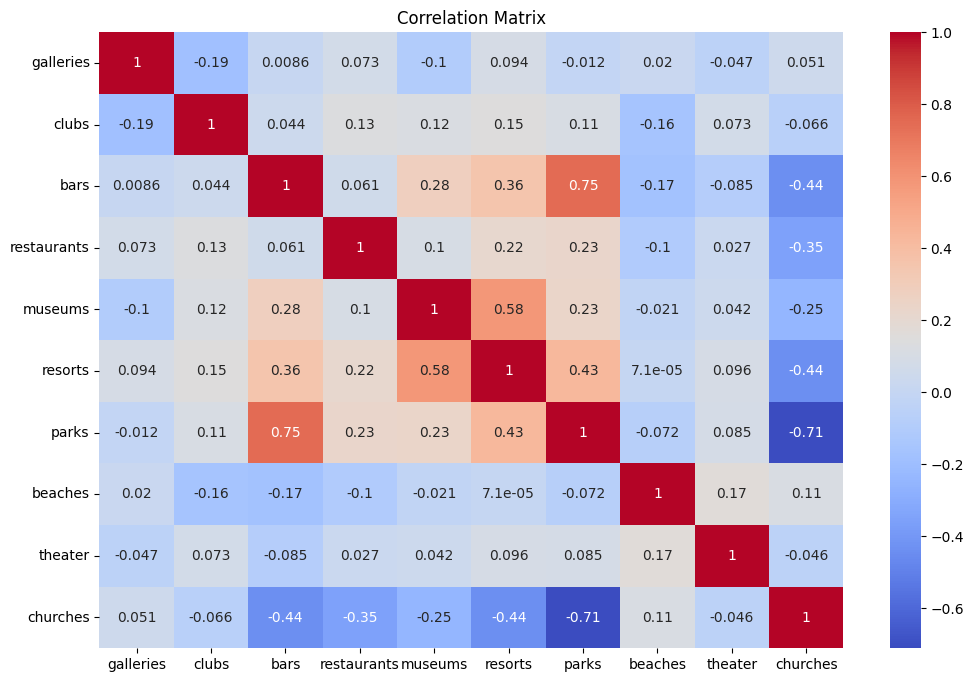

Descriptive Statistics:
        galleries       clubs        bars  restaurants     museums  \
count  980.000000  980.000000  980.000000   980.000000  980.000000   
mean     0.893194    1.352612    1.013306     0.532500    0.939735   
std      0.326912    0.478280    0.788607     0.279731    0.437430   
min      0.340000    0.000000    0.130000     0.150000    0.060000   
25%      0.670000    1.080000    0.270000     0.410000    0.640000   
50%      0.830000    1.280000    0.820000     0.500000    0.900000   
75%      1.020000    1.560000    1.572500     0.580000    1.200000   
max      3.220000    3.640000    3.620000     3.440000    3.300000   

          resorts       parks     beaches     theater    churches  
count  980.000000  980.000000  980.000000  980.000000  980.000000  
mean     1.842898    3.180939    2.835061    1.569439    2.799224  
std      0.539538    0.007824    0.137505    0.364629    0.321380  
min      0.140000    3.160000    2.420000    0.740000    2.140000  
25%  

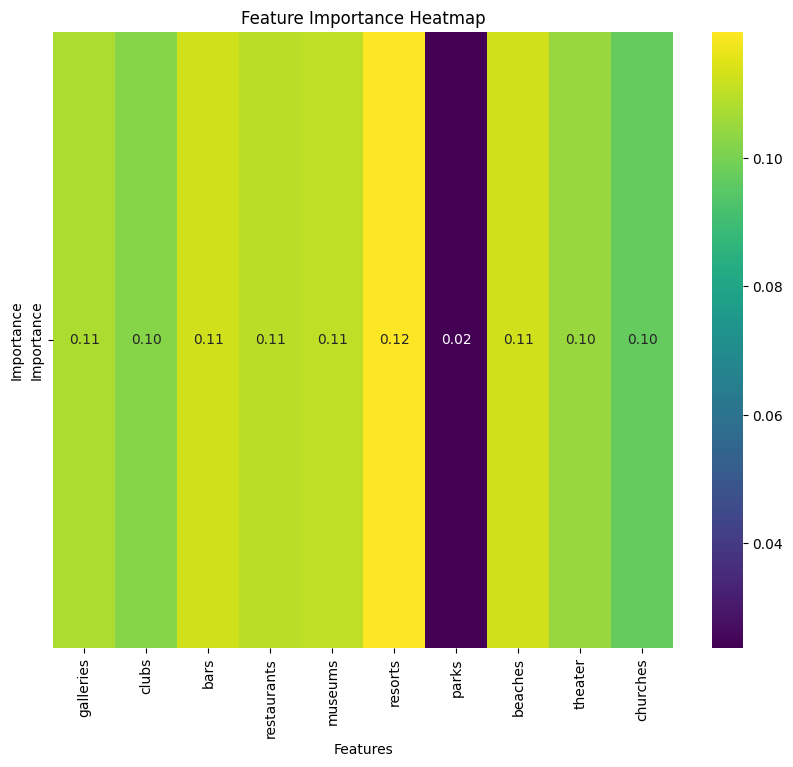

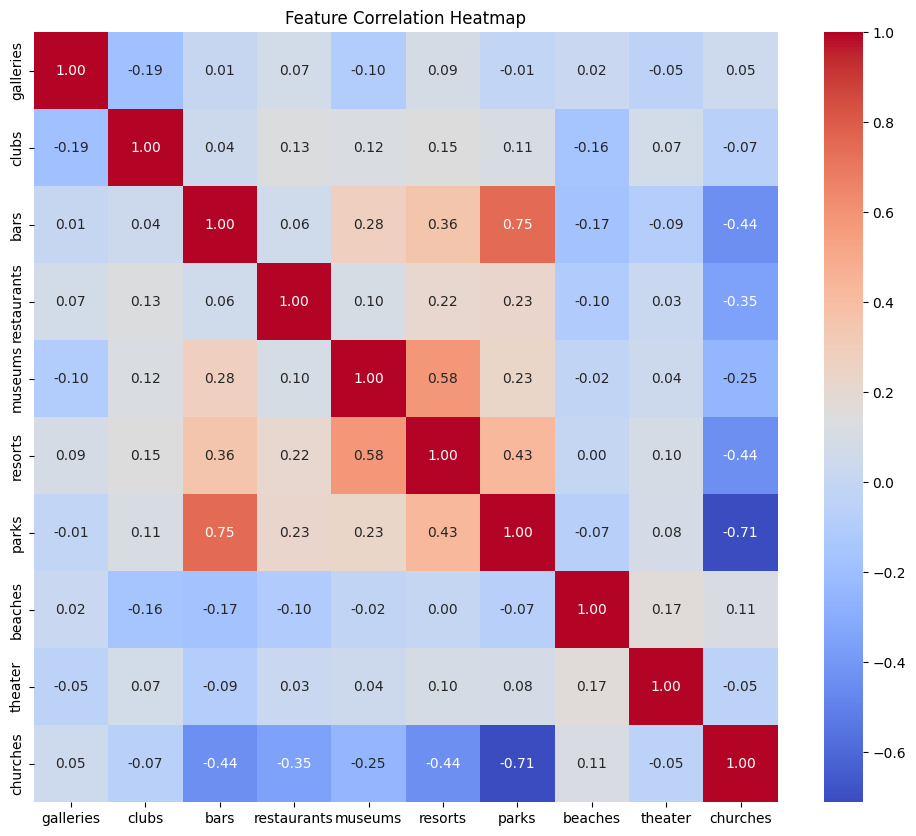

<ipython-input-6-8a08beb328dc>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=selected_features, palette='viridis')


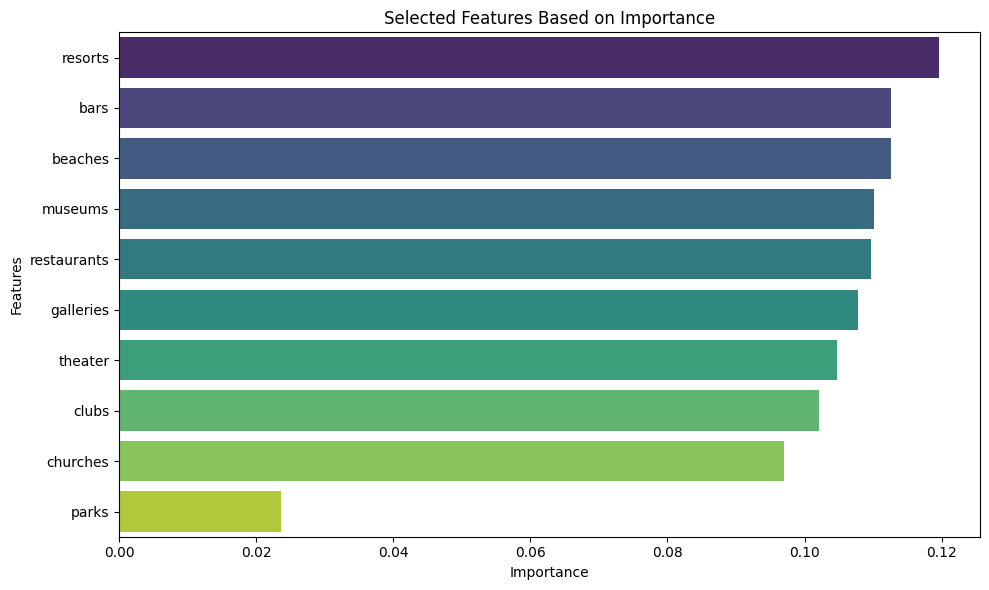

Selected features based on importance threshold of 0.01: ['resorts', 'bars', 'beaches', 'museums', 'restaurants', 'galleries', 'theater', 'clubs', 'churches', 'parks']


<ipython-input-7-65db4390c76e>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', cmap='viridis')


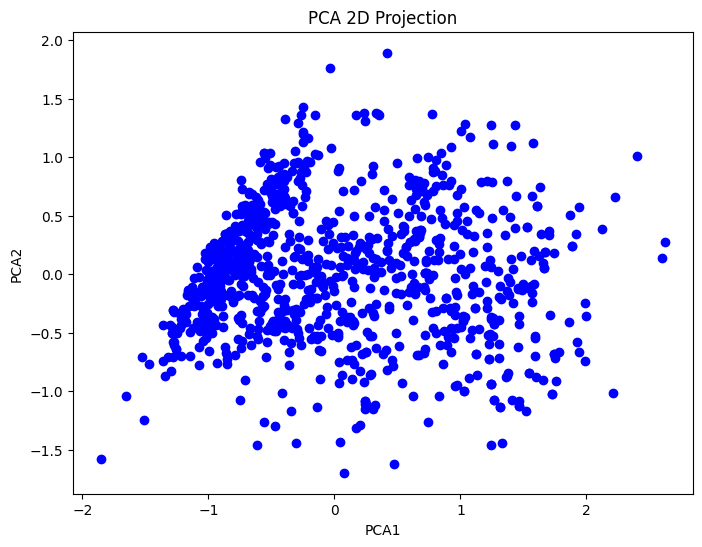

<ipython-input-7-65db4390c76e>:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='red', cmap='plasma')


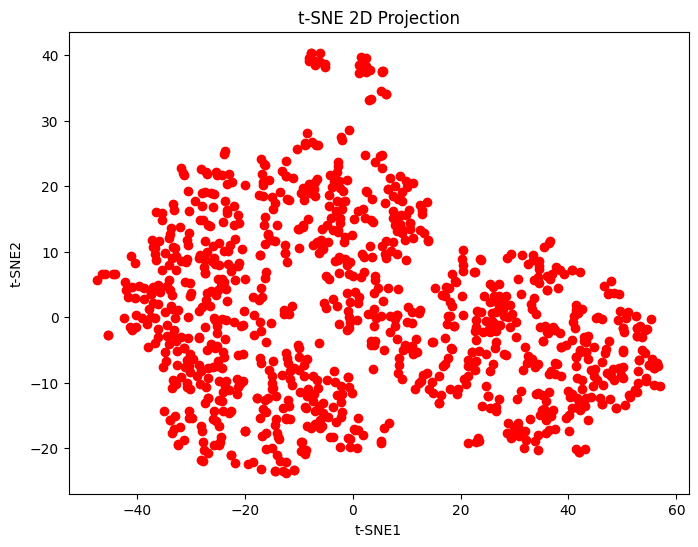

PCA and t-SNE visualizations completed


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

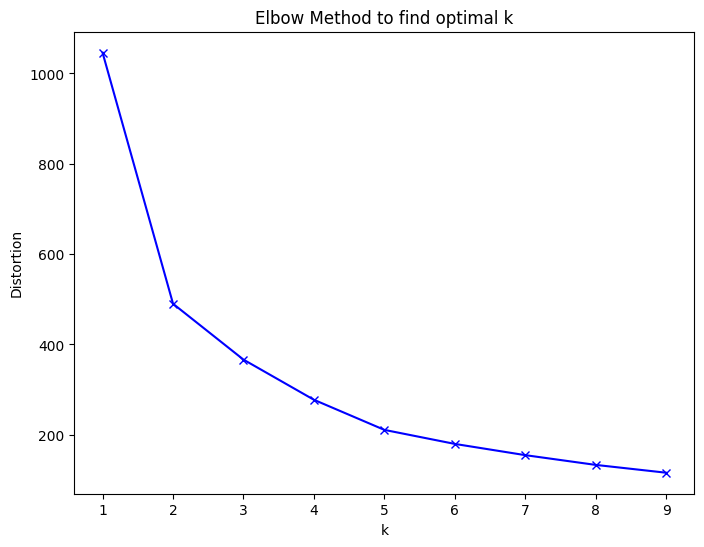

Please enter the optimal number of clusters based on the elbow curve: 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.3974583477262426


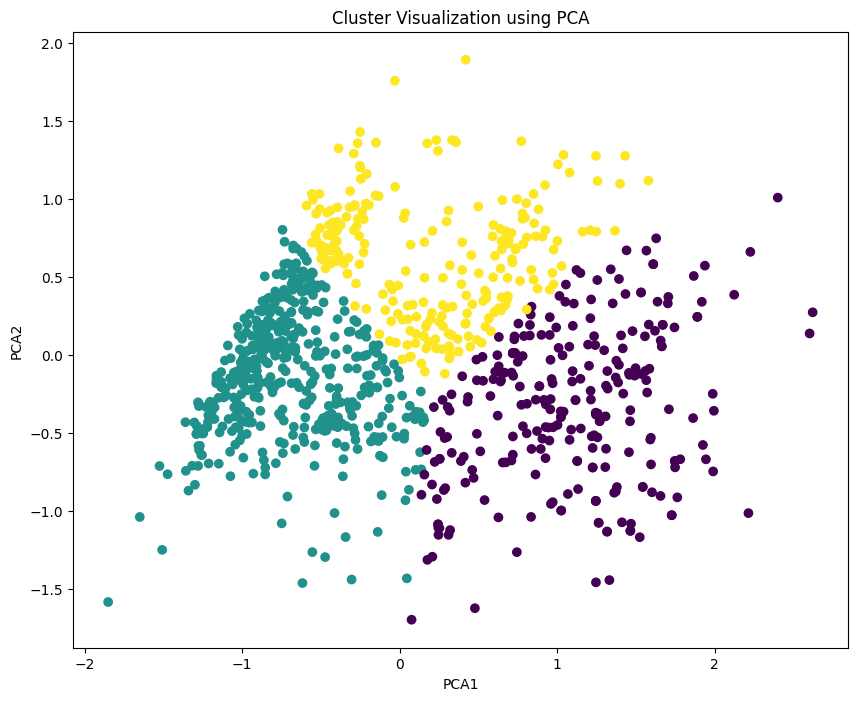

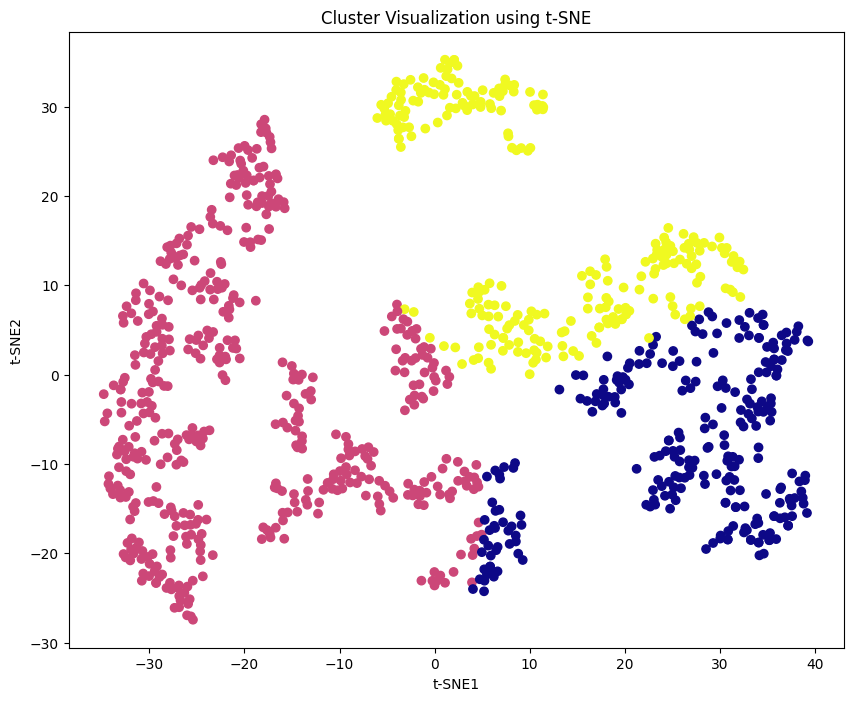

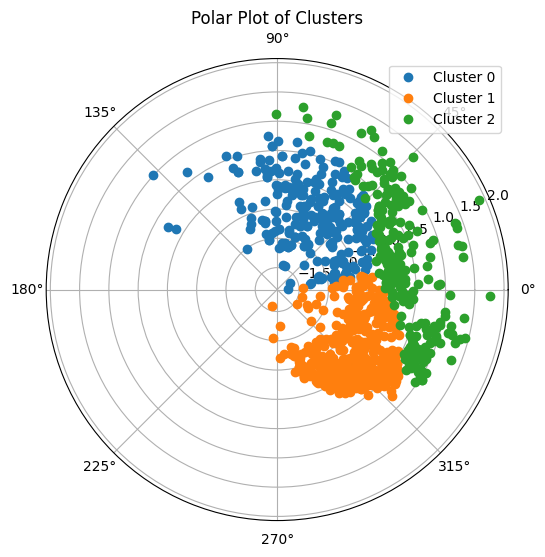

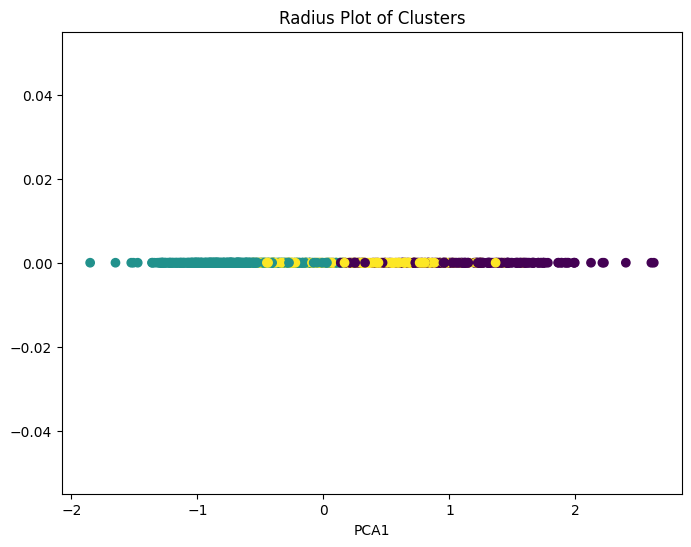

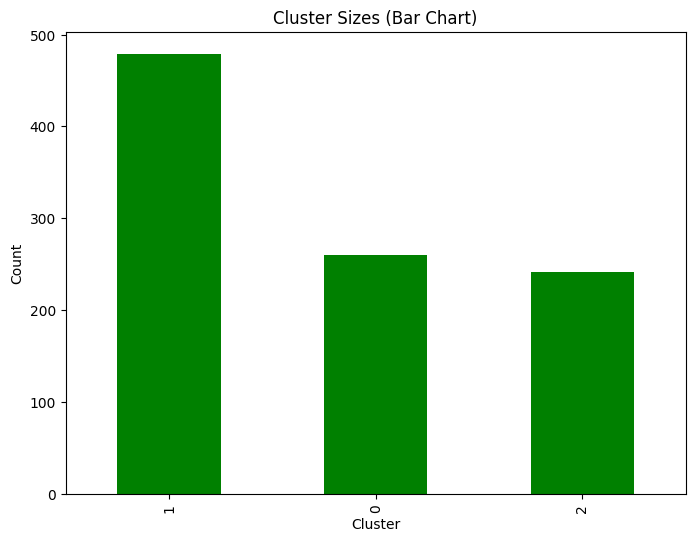

Centroids of each cluster:
Centroid of Cluster 0: [ 1.08578374 -0.3391192 ]
Centroid of Cluster 1: [-0.69464111 -0.13146008]
Centroid of Cluster 2: [0.21287233 0.62314566]


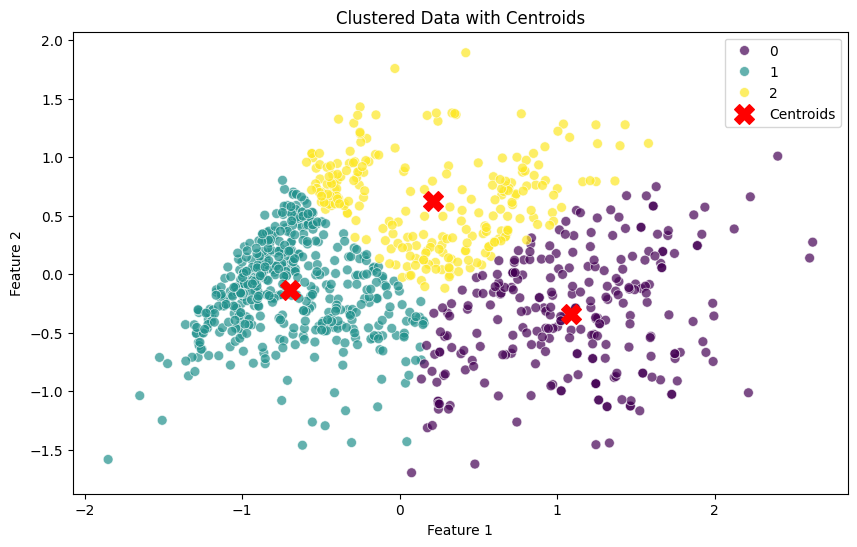


Rows in Cluster 0:
     resorts  bars  beaches  museums  restaurants  galleries  theater  clubs  \
0       2.42  2.29     2.79     0.80         0.62       0.93     1.82   1.80   
1       3.18  2.66     2.63     1.42         0.64       1.02     1.86   2.20   
12      1.74  2.75     2.87     0.98         0.45       0.74     1.38   1.44   
13      1.72  2.27     2.91     1.26         0.45       0.58     2.30   1.64   
14      2.84  2.29     2.82     1.20         0.51       0.96     2.02   1.68   
..       ...   ...      ...      ...          ...        ...      ...    ...   
954     1.22  1.71     2.70     0.34         1.12       1.25     1.50   0.84   
955     2.06  2.22     2.62     1.20         0.65       0.61     1.31   1.08   
960     1.86  1.95     2.72     1.22         0.61       0.58     1.70   1.24   
963     1.80  2.70     2.81     0.62         0.62       0.96     1.22   1.16   
966     1.82  1.82     2.74     1.52         0.40       0.91     1.73   1.96   

     churches  park

In [ ]:
master_function()

#**Interpretations**
*   **PCA 2D**

The data points are plotted on a 2-dimensional plane where the x-axis represents PCA1 and the y-axis represents PCA2. The clustering patterns observed in the plot suggest that there are distinct groups of attractions with similar characteristics based on the original features as we can see in PCA 2D graph.
* **T-SNE**

The clustering patterns observed in the plot suggest that there are distinct groups of attractions with similar characteristics based on the original features. The density of data points within each cluster indicates the concentration and distribution of attractions within those groups, while the separation between clusters reveals the distinctiveness of different groups.The proximity of clusters suggests potential relationships or associations between different groups of attractions, while outliers might represent unique attractions that do not fit well into any of the defined groups.

* **Analysis of Elbow Curve**

The elbow point appears to be around k=3, suggesting that 3 clusters might be a reasonable choice for the K-means algorithm based on the given dataset.

* **Cluster Visualization using PCA**

The clusters suggesting that the K-means algorithm has effectively identified distinct groups of attractions based on their underlying characteristics. The density of data points within each cluster varies, indicating differences in the concentration and distribution of attractions within each group.

* **Polar Plot**

The clusters appear to be reasonably well separated with minimal overlap between the data points of different clusters.The data points within each cluster are somewhat spread out, indicating a certain degree of diversity within the groups. However, there are also regions of higher density, suggesting the presence of subgroups or specific patterns within the clusters.The clusters suggesting that there might be a cyclical or periodic component to the data. This could be related to factors such as seasonal variations or recurring events.

* **Clusters data with Centroid**

The density of data points within each cluster varies. The yellow cluster has a higher density, indicating a larger number of data points in that group. The teal and purple clusters have lower densities, suggesting smaller or more dispersed groups of data points.The cluster centroids are located in the approximate center of their respective clusters, representing the average values of the data points assigned to that cluster.There are a few data points that appear to be outliers, located far from their assigned cluster centroids